In [ ]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-US;q=0.9,en-GB;q=0.8,en;q=0.7,te;q=0.6" --header="Referer: https://datahack.analyticsvidhya.com/" "https://datahack-prod.s3.amazonaws.com/train_zip/train_LbELtWX.zip" -c -O 'train_LbELtWX.zip'

--2020-10-14 12:45:07--  https://datahack-prod.s3.amazonaws.com/train_zip/train_LbELtWX.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.8
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82498602 (79M) [application/zip]
Saving to: ‘train_LbELtWX.zip’

train_LbELtWX.zip   100%[===================>]  78.68M  21.7MB/s    in 3.6s    

2020-10-14 12:45:11 (21.7 MB/s) - ‘train_LbELtWX.zip’ saved [82498602/82498602]



In [ ]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-US;q=0.9,en-GB;q=0.8,en;q=0.7,te;q=0.6" --header="Referer: https://datahack.analyticsvidhya.com/" "https://datahack-prod.s3.amazonaws.com/test_zip/test_ScVgIM0.zip" -c -O 'test_ScVgIM0.zip'

--2020-10-14 12:45:11--  https://datahack-prod.s3.amazonaws.com/test_zip/test_ScVgIM0.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.104
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13781763 (13M) [application/zip]
Saving to: ‘test_ScVgIM0.zip’

test_ScVgIM0.zip    100%[===================>]  13.14M  10.9MB/s    in 1.2s    

2020-10-14 12:45:13 (10.9 MB/s) - ‘test_ScVgIM0.zip’ saved [13781763/13781763]



In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import shutil
shutil.unpack_archive("train_LbELtWX.zip")
shutil.unpack_archive("test_ScVgIM0.zip")

In [ ]:
ls

sample_data/  test.csv          train/     train_LbELtWX.zip
test/         test_ScVgIM0.zip  train.csv


In [ ]:
train_df=pd.read_csv('train.csv')
train_df['id']=train_df['id'].apply(lambda x:str(x)+'.png')
train_df['label']=train_df['label'].apply(lambda x:str(x))
print(train_df.shape)
train_df.head()

(60000, 2)


,id,label
0,1.png,9
1,2.png,0
2,3.png,0
3,4.png,3
4,5.png,0


In [ ]:
pwd

'/content'

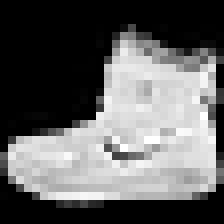

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/train/1.png',target_size=(224,224))
img

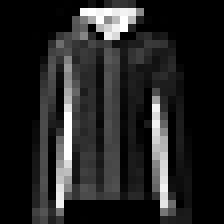

In [ ]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/test/test_images/60007.png',target_size=(224,224))
img

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255., 
shear_range = 0.2,
rotation_range=20,
horizontal_flip=True,
width_shift_range=0.15,
height_shift_range=0.15,
zoom_range=0.2,
validation_split=0.2
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.,
rotation_range=25,
horizontal_flip=True,
width_shift_range=0.15,
height_shift_range=0.15,
zoom_range=0.15,                               
validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(dataframe=train_df, 
directory='/content/train',
x_col='id',
y_col='label',
target_size=(224,224),
class_mode='categorical',
batch_size=32,
subset='training',
seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=train_df, 
directory='/content//train',
x_col='id',
y_col='label',
target_size=(224,224),
class_mode='categorical',
batch_size=32,
subset='validation',
seed=7)

Found 48000 validated image filenames belonging to 10 classes.
Found 12000 validated image filenames belonging to 10 classes.


In [ ]:
#Callbacks
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
filepath_1="best_model_1.hdf5"
filepath_2="best_model_2.hdf5"
filepath_3="best_model_3.hdf5"

checkpoint_1 = ModelCheckpoint(filepath_1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint_2 = ModelCheckpoint(filepath_2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint_3 = ModelCheckpoint(filepath_3, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_acc', mode='max',patience=25)


callbacks_list_1 = [checkpoint_1,es]
callbacks_list_2 = [checkpoint_2,es]
callbacks_list_3 = [checkpoint_3,es]

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D ,GlobalAveragePooling2D,Flatten
from tensorflow.keras.layers import Activation,MaxPooling2D,Dropout,BatchNormalization

base_model=VGG16(include_top=False, input_shape=(224, 224, 3))

model=Flatten()(base_model.layers[-1].output)
#model=Dense(512,activation='relu')(model)
#model=Dropout(0.2)(model)
model=Dense(256,activation='relu')(model)
model=Dense(128,activation='relu')(model)
model=Dropout(0.2)(model)
model=Dense(32,activation='relu')(model)
model=Dense(16,activation='relu')(model)
model_output=Dense(10,activation='softmax')(model)

model_1=Model(inputs=base_model.input,outputs=model_output)

#model_1.summary()

In [ ]:
model_1.compile(optimizer='adam',metrics='acc',loss='categorical_crossentropy')
hist=model_1.fit_generator(train_generator,epochs=350,validation_data=(validation_generator),steps_per_epoch=len(train_generator)//32,
  validation_steps=len(validation_generator)//32,callbacks=[callbacks_list_1])

Epoch 1/350
46/46 [==============================] - ETA: 0s - loss: 2.2922 - acc: 0.1372
Epoch 00001: val_acc improved from 0.11364 to 0.32386, saving model to best_model_1.hdf5
46/46 [==============================] - 11s 236ms/step - loss: 2.2922 - acc: 0.1372 - val_loss: 2.1164 - val_acc: 0.3239
Epoch 2/350
46/46 [==============================] - ETA: 0s - loss: 1.9133 - acc: 0.2935
Epoch 00002: val_acc improved from 0.32386 to 0.51136, saving model to best_model_1.hdf5
46/46 [==============================] - 11s 230ms/step - loss: 1.9133 - acc: 0.2935 - val_loss: 1.4629 - val_acc: 0.5114
Epoch 3/350
46/46 [==============================] - ETA: 0s - loss: 1.4567 - acc: 0.4939
Epoch 00003: val_acc improved from 0.51136 to 0.61364, saving model to best_model_1.hdf5
46/46 [==============================] - 11s 231ms/step - loss: 1.4567 - acc: 0.4939 - val_loss: 1.1609 - val_acc: 0.6136
Epoch 4/350
46/46 [==============================] - ETA: 0s - loss: 1.0804 - acc: 0.6332
Epoch 0

In [ ]:
model_1.compile(optimizer='adam',metrics='acc',loss='categorical_crossentropy')
hist=model_1.fit_generator(train_generator,epochs=350,validation_data=(validation_generator),steps_per_epoch=len(train_generator)//32,
  validation_steps=len(validation_generator)//32,callbacks=[callbacks_list_2])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/350
46/46 [==============================] - ETA: 0s - loss: 2.3338 - acc: 0.1393
Epoch 00001: val_acc improved from -inf to 0.22727, saving model to best_model_2.hdf5
46/46 [==============================] - 23s 496ms/step - loss: 2.3338 - acc: 0.1393 - val_loss: 1.9715 - val_acc: 0.2273
Epoch 2/350
46/46 [==============================] - ETA: 0s - loss: 1.9289 - acc: 0.2446
Epoch 00002: val_acc improved from 0.22727 to 0.29261, saving model to best_model_2.hdf5
46/46 [==============================] - 23s 496ms/step - loss: 1.9289 - acc: 0.2446 - val_loss: 1.7241 - val_acc: 0.2926
Epoch 3/350
46/46 [==============================] - ETA: 0s - loss: 1.7507 - acc: 0.2806
Epoch 00003: val_acc improved from 0.29261 to 0.34943, saving model to best_model_2.hdf5
46/46 [==============================] - 23s 494ms/step - loss: 1.7507 - acc: 0.2806 - val_loss: 1.7687 - val_acc: 0.3494
Epoch 4/350
46/46 [=====

KeyboardInterrupt: ignored

In [ ]:
model_1.compile(optimizer='adam',metrics='acc',loss='categorical_crossentropy')
hist=model_1.fit_generator(train_generator,epochs=200,validation_data=(validation_generator),steps_per_epoch=len(train_generator)//32,
  validation_steps=len(validation_generator)//32,callbacks=[callbacks_list_1])

Epoch 1/200
46/46 [==============================] - ETA: 0s - loss: 0.4647 - acc: 0.8247
Epoch 00001: val_acc did not improve from 0.88021
46/46 [==============================] - 25s 548ms/step - loss: 0.4647 - acc: 0.8247 - val_loss: 0.4942 - val_acc: 0.8267
Epoch 2/200
46/46 [==============================] - ETA: 0s - loss: 0.4219 - acc: 0.8417
Epoch 00002: val_acc did not improve from 0.88021
46/46 [==============================] - 25s 537ms/step - loss: 0.4219 - acc: 0.8417 - val_loss: 0.4554 - val_acc: 0.8551
Epoch 3/200
46/46 [==============================] - ETA: 0s - loss: 0.4042 - acc: 0.8485
Epoch 00003: val_acc did not improve from 0.88021
46/46 [==============================] - 25s 534ms/step - loss: 0.4042 - acc: 0.8485 - val_loss: 0.3722 - val_acc: 0.8608
Epoch 4/200
46/46 [==============================] - ETA: 0s - loss: 0.4060 - acc: 0.8512
Epoch 00004: val_acc did not improve from 0.88021
46/46 [==============================] - 25s 534ms/step - loss: 0.4060 - a

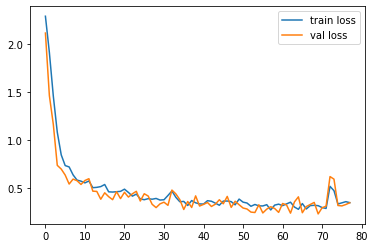

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()

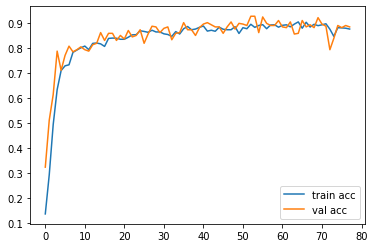

In [ ]:
plt.plot(hist.history['acc'],label='train acc')
plt.plot(hist.history['val_acc'],label='val acc')
plt.legend()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/best_model_2.h5')
#model_2.load_weights('/content/best_model_2.h5') #loading weights of best model
score= model.evaluate(validation_generator,verbose=1)

375/375 [==============================] - 41s 110ms/step - loss: 0.2574 - accuracy: 0.9100


In [ ]:
#model_1.load_weights('/content/best_model_2.hdf5') #loading weights of best model
model = load_model('/content/best_model_2.hdf5')
score= model.evaluate(validation_generator,verbose=1)

375/375 [==============================] - 137s 366ms/step - loss: 0.3966 - acc: 0.8551


In [ ]:
mkdir test_image

In [ ]:
for i in os.listdir('/content/test/'):
  if i!='test_images':
    shutil.move('/content/test/'+i,'/content/test/test_image/')
    

In [ ]:
test_df=pd.read_csv('test.csv')
test_df['id']=test_df['id'].apply(lambda x:str(x)+'.png')
print(test_df.shape)
test_df.head()

(10000, 1)


,id
0,60001.png
1,60002.png
2,60003.png
3,60004.png
4,60005.png


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.) 

test_generator = test_datagen.flow_from_directory(
    directory="/content/test/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 10000 images belonging to 1 classes.


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model = load_model('/content/best_model_2.h5')
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

10000/10000 [==============================] - 52s 5ms/step


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model = load_model('/content/best_model_2.hdf5')
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

10000/10000 [==============================] - 82s 8ms/step


In [ ]:
test_pred=np.argmax(pred,axis=1)
test_pred_df=test_df.copy()
test_pred_df['label']=test_pred
test_pred_df['id']=test_pred_df['id'].apply(lambda x:x.split('.')[0])
print(test_pred_df.shape)
test_pred_df.head(10)

(10000, 2)


,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
5,60006,1
6,60007,4
7,60008,6
8,60009,5
9,60010,7


In [ ]:
test_pred_df.to_csv('test_pred_df_9.csv',index=False)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# Hyperparameters
batch_size = 128
compression = 0.5
num_filter = 60
num_classes = 10
l = 4

In [ ]:
# Dense Block
def denseblock(input, num_filter):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    flat = layers.Flatten()(AvgPooling)
    output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [ ]:
input = layers.Input(shape=(224, 224, 3,))
First_Conv2D = layers.Conv2D(num_filter, (5,5), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D, num_filter)
First_Transition = transition(First_Block, num_filter)

Second_Block = denseblock(First_Transition, num_filter)
Second_Transition = transition(Second_Block, num_filter)

Third_Block = denseblock(Second_Transition, num_filter)
Third_Transition = transition(Third_Block, num_filter)

Last_Block = denseblock(Third_Transition,  num_filter)
output = output_layer(Last_Block)
model_2 = Model(inputs=[input], outputs=[output])

# determine Loss function and Optimizer
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
################ Tensorboard callback##########
%load_ext tensorboard
!rm -rf ./logs/
import datetime
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

from tensorflow.keras.callbacks import ModelCheckpoint
import os
if not os.path.exists('my_folder'):
  os.makedirs('my_folder')
filepath="best_model_2.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',save_best_only=True, mode='max',verbose=1)

#https://towardsdatascience.com/neural-network-with-tensorflow-how-to-stop-training-using-callback-5c8d575c18a9
from keras.callbacks import Callback
TEST_ACCURACY_THRESHOLD = 0.999
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > TEST_ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(TEST_ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True
early_stop = myCallback()

final_callbacks=[checkpoint,early_stop,tensorboard_callback]

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
hist=model_2.fit_generator(train_generator,epochs=200,validation_data=(validation_generator),steps_per_epoch=len(train_generator)//32,
  validation_steps=len(validation_generator)//32,callbacks=[final_callbacks])

Epoch 1/200
46/46 [==============================] - ETA: 0s - loss: 2.7469 - accuracy: 0.3682
Epoch 00001: val_accuracy improved from -inf to 0.10227, saving model to best_model_2.h5
46/46 [==============================] - 28s 598ms/step - loss: 2.7469 - accuracy: 0.3682 - val_loss: 3.2178 - val_accuracy: 0.1023
Epoch 2/200
46/46 [==============================] - ETA: 0s - loss: 1.4779 - accuracy: 0.5204
Epoch 00002: val_accuracy did not improve from 0.10227
46/46 [==============================] - 27s 580ms/step - loss: 1.4779 - accuracy: 0.5204 - val_loss: 4.1082 - val_accuracy: 0.0938
Epoch 3/200
46/46 [==============================] - ETA: 0s - loss: 1.3518 - accuracy: 0.5496
Epoch 00003: val_accuracy improved from 0.10227 to 0.11364, saving model to best_model_2.h5
46/46 [==============================] - 27s 585ms/step - loss: 1.3518 - accuracy: 0.5496 - val_loss: 5.3896 - val_accuracy: 0.1136
Epoch 4/200
46/46 [==============================] - ETA: 0s - loss: 1.3309 - accur

KeyboardInterrupt: ignored